<a href="https://colab.research.google.com/github/Changho0514/web1/blob/main/04_sklearn_penalization_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook we will explore the three methods and compare their results with a multiple liear regression model applied to our synthetic data generated from the following true model f(x)

$$
y=f(x)=x+2x^2-3x^3+\epsilon
$$

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
sns.set()  #if you want to use seaborn themes with matplotlib functions
import warnings
warnings.filterwarnings('ignore')

In [7]:
 rand_state= 1000

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
df=pd.read_csv('/content/drive/MyDrive/Regularization_synthetic.csv')

In [13]:
df.head()

,X1,X2,X3,X4,X5,y
0,1.668068,2.782452,4.641320,7.742038,12.914249,-3.901562
1,0.925862,0.857220,0.793667,0.734826,0.680348,-0.384578
2,1.057997,1.119357,1.184276,1.252960,1.325628,12.493677
3,-0.920339,0.847024,-0.779549,0.717449,-0.660297,12.237389
4,1.299748,1.689346,2.195725,2.853890,3.709339,-3.772851


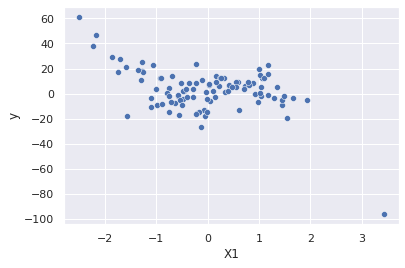

In [14]:
sns.scatterplot(x='X1', y='y', data=df)
plt.show()

**important**: we need to normalize the features before training the models.

In [15]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler=StandardScaler()
df_sc= scaler.fit_transform(df)  #normalize된 값으로 치환되어 나옴
df_sc[0]

array([ 1.68559489,  1.10379599,  0.93969261,  0.28529469,  0.20893775,
       -0.41160092])

In [19]:
df.describe()

,X1,X2,X3,X4,X5,y
count,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,100.000000
mean,-0.045528,1.035573,0.028803,3.577067e+00,2.649662e+00,3.163589
std,1.021734,1.590583,4.933266,1.467239e+01,4.937498e+01,17.251525
min,-2.502813,0.000077,-15.677801,5.990000e-09,-9.820688e+01,-96.615135
25%,-0.715772,0.106957,-0.367584,1.146202e-02,-1.894007e-01,-4.740569
50%,-0.056092,0.513483,-0.000186,2.639740e-01,-6.630000e-07,3.535766
75%,0.708103,1.265628,0.355353,1.605267e+00,1.785395e-01,12.250487
max,3.428563,11.755044,40.302907,1.381811e+02,4.737624e+02,61.375324


In [23]:
df_sc = pd.DataFrame(df_sc, columns=df.columns)  #
df_sc.head()

,X1,X2,X3,X4,X5,y
0,1.685595,1.103796,0.939693,0.285295,0.208938,-0.411601
1,0.955517,-0.112695,0.155823,-0.194689,-0.040086,-0.206709
2,1.085492,0.052941,0.235401,-0.159198,-0.026951,0.543551
3,-0.860516,-0.119138,-0.164683,-0.195880,-0.067375,0.528621
4,1.323294,0.413098,0.441460,-0.049537,0.021570,-0.404102


In [24]:
df_sc.describe()   #scaling되었음.

,X1,X2,X3,X4,X5,y
count,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
mean,-5.218048e-17,1.088019e-16,-1.002670e-17,-6.439294e-17,-3.094747e-17,-6.106227e-18
std,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00
min,-2.417131e+00,-6.542960e-01,-3.199854e+00,-2.450240e-01,-2.052955e+00,-5.812900e+00
25%,-6.592917e-01,-5.867625e-01,-8.075457e-02,-2.442389e-01,-5.778970e-02,-4.604797e-01
50%,-1.039141e-02,-3.298919e-01,-5.905921e-03,-2.269422e-01,-5.393443e-02,2.168222e-02
75%,7.413157e-01,1.453640e-01,6.652695e-02,-1.350655e-01,-5.030020e-02,5.293837e-01
max,3.417322e+00,6.773285e+00,8.204909e+00,9.220184e+00,9.589597e+00,3.391294e+00


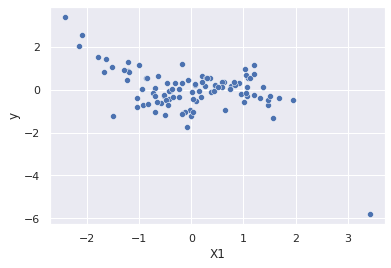

In [21]:
sns.scatterplot(x='X1', y='y', data=df_sc)
plt.show()

### Splitting the data

In [26]:
y = df_sc['y']
X = df_sc.drop('y', axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)
X_train.head()

,X1,X2,X3,X4,X5
37,1.464631,0.662152,0.606819,0.052327,0.073610
44,1.572794,0.870372,0.757779,0.153824,0.130178
55,0.275319,-0.619639,-0.003245,-0.244817,-0.053920
66,-0.493702,-0.464986,-0.039290,-0.238872,-0.054935
82,0.272588,-0.620456,-0.003337,-0.244827,-0.053921


In [28]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(80, 5)
(20, 5)
(80,)
(20,)


In [29]:
X_test_wc = sm.add_constant(X_test)
X_train_wc = sm.add_constant(X_train)

In [30]:
model = sm.OLS(y_train, X_train_wc).fit()  #linear regression을 돌려줌. 통계적인 값을 보여줌
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.414
Method:                 Least Squares   F-statistic:                     12.17
Date:                Mon, 10 Jan 2022   Prob (F-statistic):           1.28e-08
Time:                        07:18:18   Log-Likelihood:                -65.981
No. Observations:                  80   AIC:                             144.0
Df Residuals:                      74   BIC:                             158.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0870      0.173      0.504      0.616      -0.257       0.431
X1             0.5370      0.199      2.705      0.008       0.141       0.933
X2             0.1037      0.302      0.343      0.732      -0.498       0.705
X3            -2.1339      0.839     -2.543      0.013      -3.806      -0.462
X4             0.2535      0.861      0.294      0.769      -1.463       1.970
X5             1.5933      1.669      0.954      0.343      -1.733       4.920
==============================================================================
Omnibus:                       11.757   Durbin-Watson:                   2.213
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               14.171
Skew:                          -0.701   Prob(JB):                     0.000837
Kurtosis:                       4.512   Cond. No.                         33.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# A) Training the models

In this section we will train 4 different models:

1. Linear regression (model_linear)
2. Ridge regression (model_ridge)
3. Lasso regression (model_lasso)
4. Elastic Net regression (model_net)

In [32]:
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV #자체적인 CV모델을 제공한다.

In [33]:
model_linear = LinearRegression()
model_ridge = Ridge(alpha=0)  #alpha : lambda
model_lasso = Lasso(alpha=0)
model_net = ElasticNet(alpha=0)

In [34]:
y_hat_linear= model_linear.fit(X_train, y_train).predict(X_test)
y_hat_ridge = model_ridge.fit(X_train, y_train).predict(X_test)
y_hat_lasso = model_lasso.fit(X_train, y_train).predict(X_test)
y_hat_net   = model_net.fit(X_train, y_train).predict(X_test)

In [35]:
df_predictions = pd.DataFrame({'y_test':y_test,
                               'y_hat_linear':y_hat_linear,
                               'y_hat_ridge':y_hat_ridge,
                               'y_hat_lasso':y_hat_lasso,
                               'y_hat_net':y_hat_net})
df_predictions.head()

,y_test,y_hat_linear,y_hat_ridge,y_hat_lasso,y_hat_net
88,1.307243,0.171067,0.171067,0.171067,0.171067
4,-0.404102,-0.079686,-0.079686,-0.079686,-0.079686
62,-1.055680,-0.180921,-0.180921,-0.180921,-0.180921
63,2.538916,2.344482,2.344482,2.344482,2.344482
48,1.144605,-0.078630,-0.078630,-0.078630,-0.078630


### coefficients

In [36]:
df.drop('y', axis=1, inplace=False).columns

Index(['X1', 'X2', 'X3', 'X4', 'X5'], dtype='object')

In [37]:
coefficients = pd.DataFrame({'Features':df.drop('y', axis=1, inplace=False).columns})
coefficients['model_lin']= model_linear.coef_
coefficients['model_ridge']= model_ridge.coef_
coefficients['model_lasso']= model_lasso.coef_
coefficients['model_net']= model_net.coef_
coefficients

,Features,model_lin,model_ridge,model_lasso,model_net
0,X1,0.537047,0.537047,0.537047,0.537047
1,X2,0.103655,0.103655,0.103655,0.103655
2,X3,-2.133872,-2.133872,-2.133872,-2.133872
3,X4,0.253492,0.253492,0.253492,0.253492
4,X5,1.593336,1.593336,1.593336,1.593336


### Performance in the test set¶


In [38]:
MSE_test = np.mean(np.square(df_predictions['y_test'] - df_predictions['y_hat_linear']))
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test,3)

2.037

In [39]:
MSE_test = np.mean(np.square(df_predictions['y_test'] - df_predictions['y_hat_ridge']))
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test,3)

2.037

In [40]:
MSE_test = np.mean(np.square(df_predictions['y_test'] - df_predictions['y_hat_lasso']))
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test,3)

2.037

In [41]:
MSE_test = np.mean(np.square(df_predictions['y_test'] - df_predictions['y_hat_net']))
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test,3)

2.037

### Plotting the regression coefficients vs alphas:

#### 1) Ridge regression coefficients vs alpha


In [42]:
np.linspace(-2, 4, 100) # -2와 4까지를 100개로 쪼개라 

array([-2.        , -1.93939394, -1.87878788, -1.81818182, -1.75757576,
       -1.6969697 , -1.63636364, -1.57575758, -1.51515152, -1.45454545,
       -1.39393939, -1.33333333, -1.27272727, -1.21212121, -1.15151515,
       -1.09090909, -1.03030303, -0.96969697, -0.90909091, -0.84848485,
       -0.78787879, -0.72727273, -0.66666667, -0.60606061, -0.54545455,
       -0.48484848, -0.42424242, -0.36363636, -0.3030303 , -0.24242424,
       -0.18181818, -0.12121212, -0.06060606,  0.        ,  0.06060606,
        0.12121212,  0.18181818,  0.24242424,  0.3030303 ,  0.36363636,
        0.42424242,  0.48484848,  0.54545455,  0.60606061,  0.66666667,
        0.72727273,  0.78787879,  0.84848485,  0.90909091,  0.96969697,
        1.03030303,  1.09090909,  1.15151515,  1.21212121,  1.27272727,
        1.33333333,  1.39393939,  1.45454545,  1.51515152,  1.57575758,
        1.63636364,  1.6969697 ,  1.75757576,  1.81818182,  1.87878788,
        1.93939394,  2.        ,  2.06060606,  2.12121212,  2.18

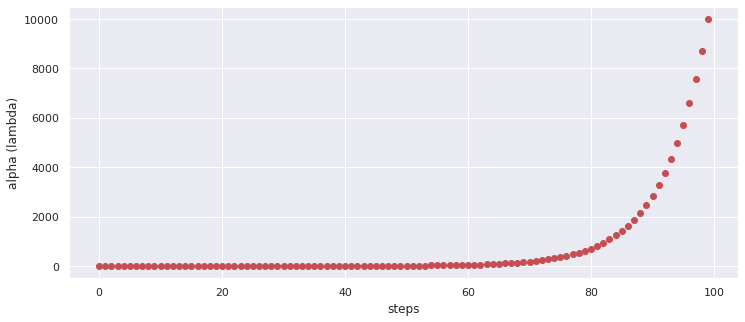

In [43]:
alpha_ridge = 10**np.linspace(-2,4,100)
plt.figure(figsize=(12,5))
plt.plot(alpha_ridge,'or' )
plt.xlabel('steps')
plt.ylabel('alpha (lambda)')
plt.show()

In [44]:
ridge = Ridge()
coefs_ridge = []

for i in alpha_ridge:
    ridge.set_params(alpha = i)
    ridge.fit(X_train, y_train) # fitting 시키고, 
    coefs_ridge.append(ridge.coef_) # 결과를 coefs_ridge에 저장.
    
np.shape(coefs_ridge)

(100, 5)

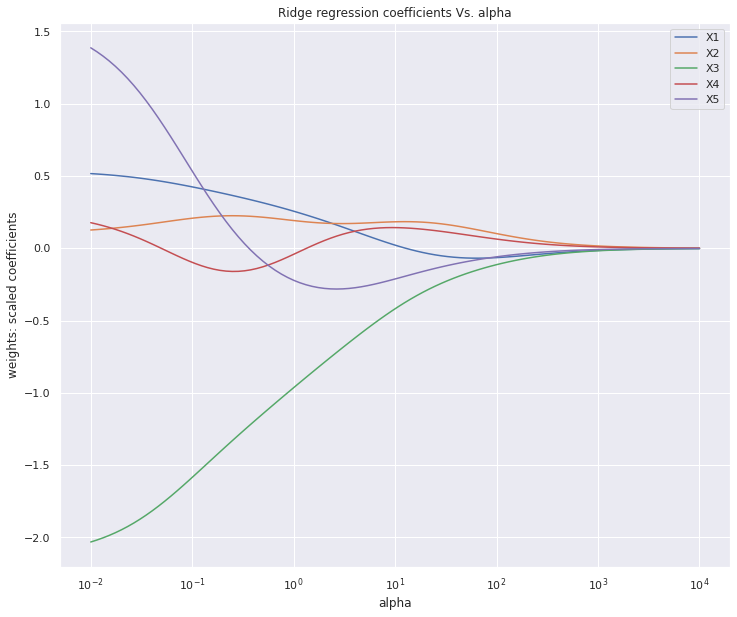

In [45]:
# alpha가 점점 커질때 0으로 수렴
plt.figure(figsize=(12,10))
ax = plt.gca()
ax.plot(alpha_ridge, coefs_ridge) #ridge
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights: scaled coefficients')
plt.title('Ridge regression coefficients Vs. alpha')
plt.legend(df.drop('y',axis=1, inplace=False).columns)

plt.show()

#### 2) Lasso regression coefficients vs alpha


In [47]:
alpha_lasso = 10**np.linspace(-3,1,100)

In [48]:
lasso = Lasso()
coefs_lasso = []

for i in alpha_lasso:
    lasso.set_params(alpha = i)
    lasso.fit(X_train, y_train)
    coefs_lasso.append(lasso.coef_)
    
np.shape(coefs_lasso)

(100, 5)

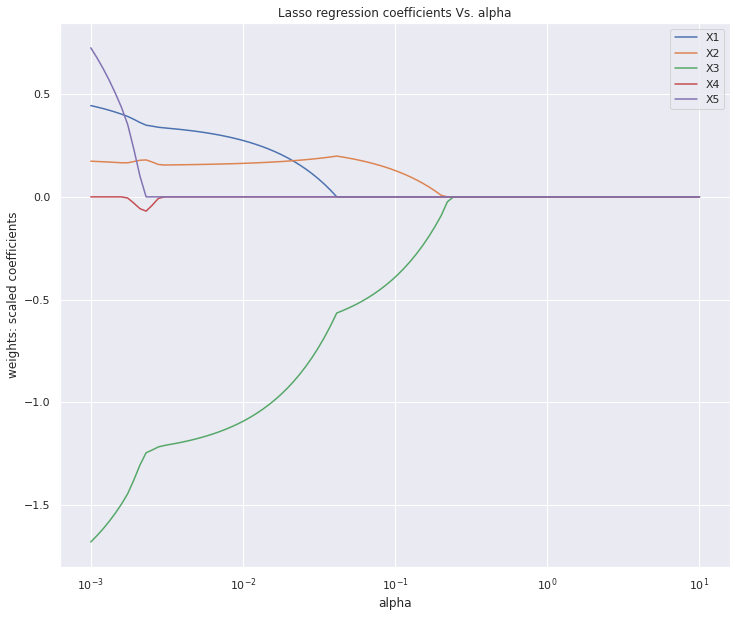

In [49]:
plt.figure(figsize=(12,10))
ax = plt.gca()
ax.plot(alpha_lasso, coefs_lasso)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights: scaled coefficients')
plt.title('Lasso regression coefficients Vs. alpha')
plt.legend(df.drop('y',axis=1, inplace=False).columns)

plt.show()

#### 3) ElasticNet regression coefficients vs alpha


In [50]:
alpha_elasticnet = 10**np.linspace(-3,2,100)

In [51]:
elasticnet = ElasticNet()
coefs_elasticnet = []

for i in alpha_elasticnet:
    elasticnet.set_params(alpha = i)
    elasticnet.fit(X_train, y_train)
    coefs_elasticnet.append(elasticnet.coef_)
    
np.shape(coefs_elasticnet)

(100, 5)

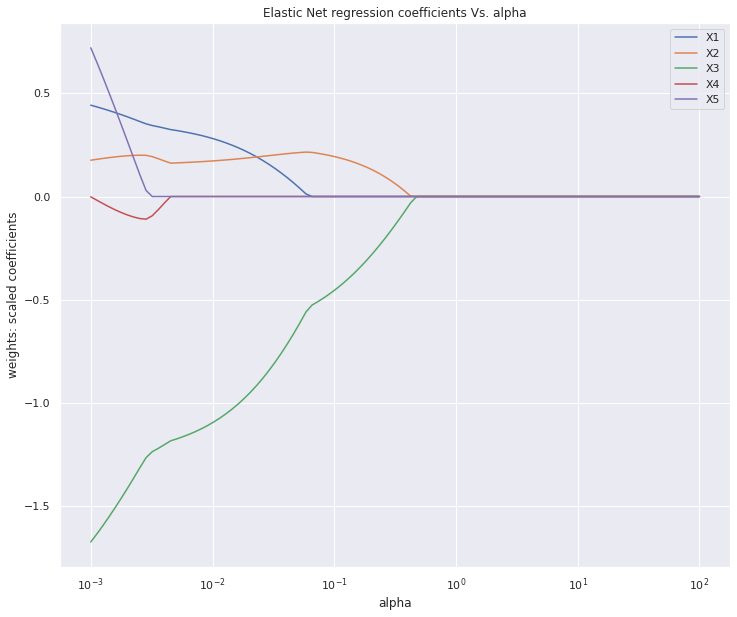

In [52]:
plt.figure(figsize=(12,10))
ax = plt.gca()
ax.plot(alpha_elasticnet, coefs_elasticnet)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights: scaled coefficients')
plt.title('Elastic Net regression coefficients Vs. alpha')
plt.legend(df.drop('y',axis=1, inplace=False).columns)

plt.show()

## Cross Validation
Let's use cross validation to find the optimal Lambdas (alphas) for different models.

#### 1) Optimal alpha for Ridge regression

In [53]:
ridgecv = RidgeCV()
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

1.0

In [54]:
alpha_ridge_opt = ridgecv.alpha_

--------

#### 2) Optimal alpha for Lasso regression

In [55]:
lassocv = LassoCV()
lassocv.fit(X_train, y_train)
lassocv.alpha_  #최적의 alpha값까지 최적의 Optimal 값을 찾아줌 

0.004564470133023309

In [56]:
alpha_lasso_opt = lassocv.alpha_

-----------------

#### 3) Optimal alpha for Elastic Net regression

In [57]:
elasticnetcv = ElasticNetCV()
elasticnetcv.fit(X_train, y_train)
elasticnetcv.alpha_

0.006440286888331817

In [58]:
elasticnetcv.l1_ratio_

0.5

In [59]:
from sklearn.model_selection import cross_val_score
import sklearn.metrics

In [60]:
RMSE_CV=[]
iterator= np.arange(0.0,0.02,0.001)
for i in iterator:
    MSE = -cross_val_score(estimator = ElasticNet(alpha=i), X = X_train, y = y_train, cv = 5 , scoring="neg_mean_squared_error" )
    RMSE_CV.append(np.sqrt(MSE).mean())
    
output = pd.DataFrame(list(iterator), columns=['lambda_ElasticNet'])
output['RMSE_CV']=RMSE_CV

output.head()

,lambda_ElasticNet,RMSE_CV
0,0.000,0.683684
1,0.001,0.583633
2,0.002,0.580799
3,0.003,0.578804
4,0.004,0.576902


In [61]:
output['RMSE_CV'].idxmin()

7

In [62]:
output['lambda_ElasticNet'][output['RMSE_CV'].idxmin()]

0.007

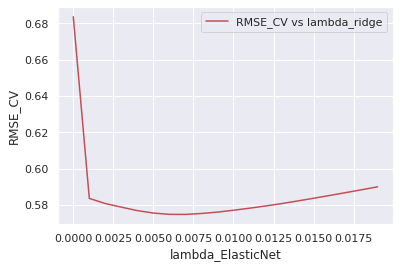

In [63]:
sns.lineplot(x='lambda_ElasticNet', y='RMSE_CV', data=output , color='r', label="RMSE_CV vs lambda_ridge")
plt.show()

# Done!